<a href="https://colab.research.google.com/github/GENTLEW1ND/Python/blob/main/Smartphone_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
!pip install kaggle

In [37]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [38]:
# Kaggle api
!kaggle datasets download abdulmalik1518/mobiles-dataset-2025

Dataset URL: https://www.kaggle.com/datasets/abdulmalik1518/mobiles-dataset-2025
License(s): apache-2.0
mobiles-dataset-2025.zip: Skipping, found more recently modified local copy (use --force to force download)


In [39]:
!ls

'Mobiles Dataset (2025).csv'   mobiles-dataset-2025.zip   sample_data


In [40]:
# Extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/mobiles-dataset-2025.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
#loading the csv file to pd dataset
data = pd.read_csv("/content/Mobiles Dataset (2025).csv", encoding='ISO-8859-1')

In [43]:
data.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


In [44]:
data.tail()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
925,Poco,Pad 5G 128GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"PKR 66,220","INR 23,999","CNY 2,099",USD 280,"AED 1,029",2024
926,Poco,Pad 5G 256GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"PKR 71,220","INR 25,999","CNY 2,299",USD 300,"AED 1,099",2024
927,Samsung,Galaxy Z Fold6 256GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"PKR 604,999","INR 164,999","¥13,999","USD 1,899","AED 7,199",2024
928,Samsung,Galaxy Z Fold6 512GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"PKR 544,999","INR 176,999","CNY 15,999",USD 1719,"AED 7,699",2024
929,Samsung,Galaxy Z Fold6 1TB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,Not available,"INR 200,999","CNY 17,999","USD 2,259","AED 8,699",2024


In [45]:
data.describe()

,Launched Year
count,930.000000
mean,2022.193548
std,1.862080
min,2014.000000
25%,2021.000000
50%,2023.000000
75%,2024.000000
max,2025.000000


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               930 non-null    object
 1   Model Name                 930 non-null    object
 2   Mobile Weight              930 non-null    object
 3   RAM                        930 non-null    object
 4   Front Camera               930 non-null    object
 5   Back Camera                930 non-null    object
 6   Processor                  930 non-null    object
 7   Battery Capacity           930 non-null    object
 8   Screen Size                930 non-null    object
 9   Launched Price (Pakistan)  930 non-null    object
 10  Launched Price (India)     930 non-null    object
 11  Launched Price (China)     930 non-null    object
 12  Launched Price (USA)       930 non-null    object
 13  Launched Price (Dubai)     930 non-null    object
 14  Launched Y

In [47]:
model_count=data['Company Name'].value_counts()

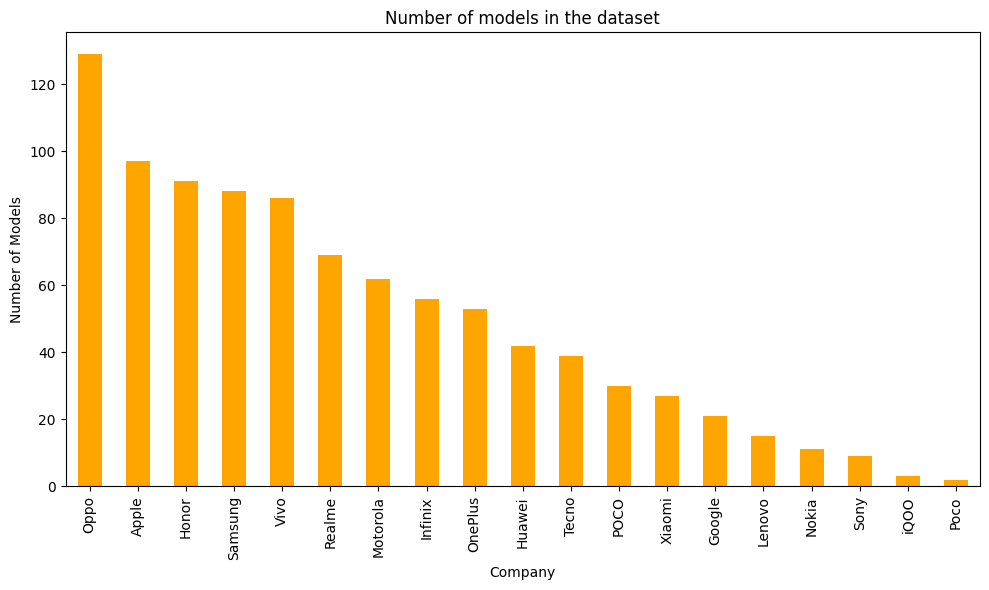

In [48]:
plt.figure(figsize=(10,6))
model_count.plot(kind="bar",color="orange")
plt.title("Number of models in the dataset")
plt.xlabel("Company")
plt.ylabel("Number of Models")
plt.tight_layout()
plt.show()

In [49]:
data = data.drop(columns=['Launched Price (Pakistan)','Launched Price (China)','Launched Price (USA)','Launched Price (Dubai)'])

In [50]:
data.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (India),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"INR 79,999",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"INR 84,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"INR 89,999",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"INR 89,999",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"INR 94,999",2024


In [51]:
data.tail()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (India),Launched Year
925,Poco,Pad 5G 128GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"INR 23,999",2024
926,Poco,Pad 5G 256GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"INR 25,999",2024
927,Samsung,Galaxy Z Fold6 256GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"INR 164,999",2024
928,Samsung,Galaxy Z Fold6 512GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"INR 176,999",2024
929,Samsung,Galaxy Z Fold6 1TB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"INR 200,999",2024


In [52]:
data.shape

(930, 11)

In [53]:
# Removing the GB part from the RAM
def remove_gb(data):
  for index, row in data.iterrows():
    if '/' in row['RAM']:
      row_varients = row['RAM'].split('/')
      row_values = [int(x.replace('GB','')) for x in row_varients]
      average_values = sum(row_values)/len(row_values)
      data.at[index,'RAM'] = f'{average_values}GB'
  return data

data = remove_gb(data)



In [54]:
data['RAM'] = data['RAM'].str.replace('GB','').astype(float)

In [55]:
data.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (India),Launched Year
0,Apple,iPhone 16 128GB,174g,6.0,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"INR 79,999",2024
1,Apple,iPhone 16 256GB,174g,6.0,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"INR 84,999",2024
2,Apple,iPhone 16 512GB,174g,6.0,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"INR 89,999",2024
3,Apple,iPhone 16 Plus 128GB,203g,6.0,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"INR 89,999",2024
4,Apple,iPhone 16 Plus 256GB,203g,6.0,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"INR 94,999",2024


In [56]:
# Convert the 'Front Camera' column to strings
data['Front Camera'] = data['Front Camera'].astype(str)
data['Back Camera'] = data['Back Camera'].astype(str)

# Function to process and average the 'Camera' values
def process_camera(data, column_name):
    for index, row in data.iterrows():
        camera_value = row[column_name]

        # Remove '(UDC)' if present
        camera_value = camera_value.replace('(UDC)', '')

        # Handle multiple values separated by comma
        if ',' in camera_value:
            row_variants = camera_value.split(',')
        else:
            row_variants = [camera_value]

        # Process each value to remove 'MP', '4K', and strip whitespace
        row_values = []
        for val in row_variants:
            val = val.replace('MP', '').replace('4K', '').strip()
            if val.isdigit():
                row_values.append(int(val))

        # Calculate average if multiple values, otherwise take the single value
        if row_values:
            average_value = sum(row_values) / len(row_values)
            data.at[index, column_name] = f'{average_value}MP'
        else:
            data.at[index, column_name] = '0MP'  # Handle case where no numeric values are present

    # Remove 'MP' and convert to float for single values
    data[column_name] = data[column_name].str.replace('MP', '').apply(lambda x: float(x.strip()))
    return data

# Apply the function
data = process_camera(data, 'Front Camera')
data = process_camera(data, 'Back Camera')




In [57]:
data.tail()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (India),Launched Year
925,Poco,Pad 5G 128GB,571g,8.0,8.0,8.0,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"INR 23,999",2024
926,Poco,Pad 5G 256GB,571g,8.0,8.0,8.0,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"INR 25,999",2024
927,Samsung,Galaxy Z Fold6 256GB,239g,12.0,7.0,50.0,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"INR 164,999",2024
928,Samsung,Galaxy Z Fold6 512GB,239g,12.0,7.0,50.0,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"INR 176,999",2024
929,Samsung,Galaxy Z Fold6 1TB,239g,12.0,7.0,50.0,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"INR 200,999",2024


In [58]:
# Removing the 'mAh' and the present ',' from the Battery Capacity column.
data['Battery Capacity'] = data['Battery Capacity'].str.replace('mAh','').replace(',','',regex=True).astype(float)
data.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (India),Launched Year
0,Apple,iPhone 16 128GB,174g,6.0,12.0,48.0,A17 Bionic,3600.0,6.1 inches,"INR 79,999",2024
1,Apple,iPhone 16 256GB,174g,6.0,12.0,48.0,A17 Bionic,3600.0,6.1 inches,"INR 84,999",2024
2,Apple,iPhone 16 512GB,174g,6.0,12.0,48.0,A17 Bionic,3600.0,6.1 inches,"INR 89,999",2024
3,Apple,iPhone 16 Plus 128GB,203g,6.0,12.0,48.0,A17 Bionic,4200.0,6.7 inches,"INR 89,999",2024
4,Apple,iPhone 16 Plus 256GB,203g,6.0,12.0,48.0,A17 Bionic,4200.0,6.7 inches,"INR 94,999",2024


In [59]:
import re

# Function to clean 'Screen Size' column and calculate average if multiple values are present
def clean_screen_size(data, column_name):
    cleaned_values = []
    for value in data[column_name]:
        # Find all numeric values in the string
        numbers = re.findall(r'\d+\.?\d*', value)
        if numbers:
            # Convert all found numbers to floats
            numeric_values = [float(num) for num in numbers]
            # Calculate average if multiple values, otherwise take the single value
            if len(numeric_values) > 1:
                cleaned_value = sum(numeric_values) / len(numeric_values)
            else:
                cleaned_value = numeric_values[0]
        else:
            cleaned_value = float('nan')
        cleaned_values.append(cleaned_value)

    data[column_name] = cleaned_values
    return data

# Apply the function to the 'Screen Size' column
data = clean_screen_size(data, 'Screen Size')

data.head()


,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (India),Launched Year
0,Apple,iPhone 16 128GB,174g,6.0,12.0,48.0,A17 Bionic,3600.0,6.1,"INR 79,999",2024
1,Apple,iPhone 16 256GB,174g,6.0,12.0,48.0,A17 Bionic,3600.0,6.1,"INR 84,999",2024
2,Apple,iPhone 16 512GB,174g,6.0,12.0,48.0,A17 Bionic,3600.0,6.1,"INR 89,999",2024
3,Apple,iPhone 16 Plus 128GB,203g,6.0,12.0,48.0,A17 Bionic,4200.0,6.7,"INR 89,999",2024
4,Apple,iPhone 16 Plus 256GB,203g,6.0,12.0,48.0,A17 Bionic,4200.0,6.7,"INR 94,999",2024


In [60]:
data['Launched Price (India)'] = data['Launched Price (India)'].str.replace('INR','').replace(',','',regex=True)
data['Launched Price (India)'] = data['Launched Price (India)'].astype(float)
data['Launched Price (India)'].head()

,Launched Price (India)
0,79999.0
1,84999.0
2,89999.0
3,89999.0
4,94999.0


In [62]:
data['Mobile Weight'] = data['Mobile Weight'].str.replace('g','').astype(float)
data['Mobile Weight'].head()

,Mobile Weight
0,174.0
1,174.0
2,174.0
3,203.0
4,203.0


In [76]:
print(data['Processor'])

0               a17 bionic
1               a17 bionic
2               a17 bionic
3               a17 bionic
4               a17 bionic
              ...         
925    snapdragon 7s gen 2
926    snapdragon 7s gen 2
927     snapdragon 8 gen 3
928     snapdragon 8 gen 3
929     snapdragon 8 gen 3
Name: Processor, Length: 930, dtype: object


In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [74]:
# Step 1: Standardize the format of the processor names
data['Processor'] = data['Processor'].str.lower().str.replace('-', ' ')
print("Standardized Processor Names:")
print(data['Processor'])

# Step 2: Tokenize processor names and extract features using TF-IDF
vectorizer = TfidfVectorizer()
processor_features = vectorizer.fit_transform(data['Processor'])

# Convert the TF-IDF features to a DataFrame for better visualization
processor_df = pd.DataFrame(processor_features.toarray(), columns=vectorizer.get_feature_names_out())
print("\nTF-IDF Features of Processor Names:")
print(processor_df)

# If needed, integrate these features with other columns
# For this example, we'll focus on the processor column itself

# Combine processed processor features into the original DataFrame
data = pd.concat([data, processor_df], axis=1)
print("\nCombined DataFrame with Processor Features:")
print(data)


Standardized Processor Names:
0               a17 bionic
1               a17 bionic
2               a17 bionic
3               a17 bionic
4               a17 bionic
              ...         
925    snapdragon 7s gen 2
926    snapdragon 7s gen 2
927     snapdragon 8 gen 3
928     snapdragon 8 gen 3
929     snapdragon 8 gen 3
Name: Processor, Length: 930, dtype: object

TF-IDF Features of Processor Names:
     1000  1000l  1080  1100  1200  1200ai  1280  1300  1300t  1380  ...  \
0     0.0    0.0   0.0   0.0   0.0     0.0   0.0   0.0    0.0   0.0  ...   
1     0.0    0.0   0.0   0.0   0.0     0.0   0.0   0.0    0.0   0.0  ...   
2     0.0    0.0   0.0   0.0   0.0     0.0   0.0   0.0    0.0   0.0  ...   
3     0.0    0.0   0.0   0.0   0.0     0.0   0.0   0.0    0.0   0.0  ...   
4     0.0    0.0   0.0   0.0   0.0     0.0   0.0   0.0    0.0   0.0  ...   
..    ...    ...   ...   ...   ...     ...   ...   ...    ...   ...  ...   
925   0.0    0.0   0.0   0.0   0.0     0.0   0.0   0.0    0.

In [75]:
data.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (India),...,spreadtrum,t606,t610,t612,t616,t618,t700,t760,tensor,unisoc
0,Apple,iPhone 16 128GB,174.0,6.0,12.0,48.0,a17 bionic,3600.0,6.1,79999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Apple,iPhone 16 256GB,174.0,6.0,12.0,48.0,a17 bionic,3600.0,6.1,84999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Apple,iPhone 16 512GB,174.0,6.0,12.0,48.0,a17 bionic,3600.0,6.1,89999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Apple,iPhone 16 Plus 128GB,203.0,6.0,12.0,48.0,a17 bionic,4200.0,6.7,89999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Apple,iPhone 16 Plus 256GB,203.0,6.0,12.0,48.0,a17 bionic,4200.0,6.7,94999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
